# Setup

In [1]:
# Boilerplate startup code
import numpy as np
import pandas as pd
from tqdm import tqdm
from hax.ipython import code_hider

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # resize plots

from pax import units

# Special analysis tools: may go into hax soon
#from load_led import load_led_data
from hax.pmt_plot import plot_on_pmt_arrays, pmt_data

code_hider()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory: 'uname'
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [36]:
from pax import core, units, dsputils
import multihist
mypax = core.Processor(config_names='XENON1T', config_dict={
    'pax': {
            'plugin_group_names': ['input', 'preprocessing'],
            'preprocessing':      ['CheckPulses.SortPulses',
                                   'CheckPulses.ConcatenateAdjacentPulses',],
            'input':              'Zip.ReadZipped',
            'encoder_plugin':     None,
            #'decoder_plugin':     'BSON.DecodeZBSON',
            'input_name':         '/project/kicp/ershockley/160916_1153'  #Run 2916
            #'input_name':          '/project/lgrandi/xenon1t/raw/160818_1450' #Run 2244 1550V
            
            

        }
    })

nevents = mypax.input_plugin.number_of_events

histograms_file = '1550V_board7_histograms_NEWRUN.csv'
thresholds_file = '1550V_board7_thresholds_NEWRUN.csv'

def get_events():
    for event in mypax.get_events():
        event = mypax.process_event(event)
        yield event
event_generator = get_events()

event = next(event_generator)

In [37]:
nevents = mypax.input_plugin.number_of_events
print("Number of events: %d" %nevents)
npulses = len(event.pulses)
print("Number of pulses per event: %d" %npulses)
samples_per_pulse = len(event.pulses[0].raw_data)
print("Number of samples per pulse: %d" %samples_per_pulse)
board_1_channels = [25, 26, 27, 28, 29, 30,
                    57, 58, 59, 60, 61,
                    82, 83, 84, 85, 86,
                    102, 103, 104, 105,
                    116, 117, 118,
                    125]
board_2_channels = [13, 14, 15, 16, 17, 18,
                    47, 48, 49, 50, 51, 52,
                    75, 76, 77, 78, 79,
                    97, 98, 99, 100,
                    113, 114,
                    123]
board_7_channels = [157, 158,
                    167, 168, 169,
                    177, 178, 179, 180, 181,
                    188, 189, 190, 191, 192,
                    201, 202, 203, 204,
                    213, 214, 215,
                    224, 225]


Number of events: 183525
Number of pulses per event: 254
Number of samples per pulse: 600


In [38]:
show_channels = board_1_channels

### Conservative LED window: [430, 459] samples, or 4300-4590 ns. 

Now redo analysis using this window and 4 noise windows of the same width.

In [50]:
amplitude_bounds = (-100, 1000)
n_channels = 254
n_loop_events = nevents





noise_hist_samples_1 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

spe_hist_samples = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_hist_max_1 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

spe_hist_max = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_hist_samples_2 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))
noise_hist_max_2 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_hist_samples_3 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))
noise_hist_max_3 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_hist_samples_4 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))
noise_hist_max_4 = multihist.Histdd(axis_names=['channel', 'amplitude'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

spe_integral = multihist.Histdd(axis_names=['channel', 'charge'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_integral = multihist.Histdd(axis_names=['channel', 'charge'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_no_baseline = multihist.Histdd(axis_names=['channel', 'charge'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

spe_no_baseline = multihist.Histdd(axis_names=['channel', 'charge'],
                              bins=(np.arange(-1, n_channels + 1), 
                                    np.arange(*amplitude_bounds)))

noise_baseline_array = np.ones((len(show_channels), n_loop_events))
LED_baseline_array = np.ones((len(show_channels), n_loop_events))

In [93]:
import scipy.integrate as integrate

def get_events():
    for event in mypax.get_events():
        event = mypax.process_event(event)
        yield event
event_generator = get_events()

LED_window = [430, 459]
nw_of_interest = [375, 404]

LED_window = [w-45 for w in LED_window]
nw_of_interest = [w-45 for w in nw_of_interest]

off_window_start = 240 # see window_watcher.ipynb

#if histograms_file[:4] == "1500":
    #nw_of_interest = [56,75]
    #off_window_start = 822
    
window_diff = LED_window[0] - nw_of_interest[0]

print('Off window start:', off_window_start)

noise_events = 0
LED_events = 0
good_events_seen = 0

else_events = []

for event_i in tqdm(range(n_loop_events)):
    event = next(event_generator)
    if not len(event.pulses) == n_channels:
        # Ignore weird events where not all channels are present
        # These are probably due to a bug in the event builder
        continue
        
    good_events_seen += 1
    channel_list = np.ones(len(show_channels))
    noise_amplitude_list_1 = np.ones(len(show_channels))
    noise_amplitude_list_2 = np.ones(len(show_channels))
    noise_amplitude_list_3 = np.ones(len(show_channels))
    noise_amplitude_list_4 = np.ones(len(show_channels))
    spe_amplitude_list = np.ones(len(show_channels))
    
    #spe_charge_list = np.ones(len(show_channels))
    #noise_charge_list = np.ones(len(show_channels))
    
    counter = 0
    for p in event.pulses:
        #if p.channel != show_channels[0]:
            #continue
        if p.channel not in show_channels:
            continue
        w = p.raw_data
        assert len(w) == samples_per_pulse
        noise_baseline = w[0:(600-window_diff)]
        LED_baseline = w[window_diff:]
        
        noise_baseline_array[counter, event_i] *= np.median(noise_baseline) 
        LED_baseline_array[counter, event_i] *= np.median(LED_baseline) 
        
        assert not np.array_equal(noise_baseline, LED_baseline)

        #noise_no_baseline.add(np.ones(len(noise_baseline))*p.channel, noise_baseline)
        #spe_no_baseline.add(np.ones(len(LED_baseline))*p.channel, LED_baseline)
        
        noise_w = np.median(noise_baseline) - noise_baseline     # Baseline the waveform by subtracting the median, flip signal
        spe_w = np.median(LED_baseline) - LED_baseline

        
        spe = spe_w[LED_window[0]:LED_window[1]]            # consider LED window only
        spe = np.clip(spe, *amplitude_bounds)        
        
        #for noise subtraction, consider different windows
        noise1 = noise_w[nw_of_interest[0]:nw_of_interest[1]]
        noise2 = noise_w[35:54]
        noise3 = noise_w[51:70]
        noise4 = noise_w[22:41]
        noise1 = np.clip(noise1, *amplitude_bounds)
        noise2 = np.clip(noise2, *amplitude_bounds)
        noise3 = np.clip(noise3, *amplitude_bounds)
        noise4 = np.clip(noise4, *amplitude_bounds)
        
        
        #LED_charge = integrate.simps(spe)
        #noise1_charge = integrate.simps(noise1)
        
        #print(len(noise1), len(spe))
        assert len(noise1) == len(spe) #== len(noise2) == len(noise3) == len(noise4)
        channel_list[counter] = p.channel
        
        noise_amplitude_list_1[counter] = max(noise1)
        noise_amplitude_list_2[counter] = max(noise2)
        noise_amplitude_list_3[counter] = max(noise3)
        noise_amplitude_list_4[counter] = max(noise4)
        spe_amplitude_list[counter] = max(spe)
        
        #noise_charge_list[counter] = noise1_charge
        #spe_charge_list[counter] = LED_charge
        
        counter+=1
        
    if (event_i >= off_window_start):    
        noise_hist_max_1.add(channel_list, noise_amplitude_list_1)
        noise_hist_max_2.add(channel_list, noise_amplitude_list_2)
        noise_hist_max_3.add(channel_list, noise_amplitude_list_3)
        noise_hist_max_4.add(channel_list, noise_amplitude_list_4)
        #noise_integral.add(channel_list, noise_charge_list)
        noise_events += 1
        
    if (event_i < n_loop_events - off_window_start):
        spe_hist_max.add(channel_list, spe_amplitude_list)
        #spe_integral.add(channel_list, spe_charge_list)
        LED_events += 1
        
    if not ((event_i >= off_window_start) or (event_i < n_loop_events - off_window_start)):
        else_events.append(event_i)
                
print("%d proper events seen in %d events" % (good_events_seen, n_loop_events))
print("noise entries:", noise_events)
print("spe entries:", LED_events)
print("else events: \n", else_events)

Off window start: 240


183518 proper events seen in 183525 events
noise entries: 183278
spe entries: 183285
else events: 
 []


In [94]:
small_correction = LED_events / noise_events
print(small_correction)

1.000038193345628


# Noise and LED Amplitudes

We have 0.0367 sec per channel, so rates below 27.2 Hz are definitely unrealiable!
The total event rate is 5000000.0000


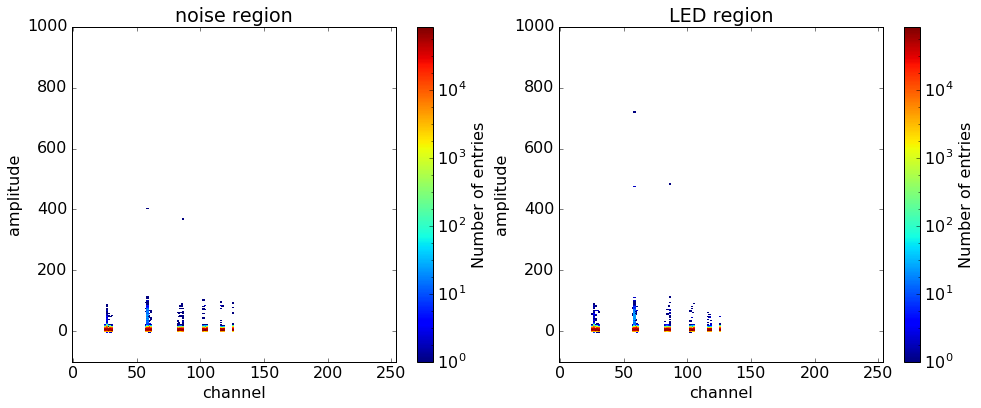

In [95]:
time_per_channel = good_events_seen * 20 * 10 * units.ns #samples_pee_pulse * 10 * units.ns
total_event_rate = good_events_seen / (time_per_channel / 1.0e9)
max_rate_hz = 1/time_per_channel / units.Hz

print("We have %0.4f sec per channel, so rates below %0.1f Hz are definitely unrealiable!" %
      (time_per_channel / units.s, max_rate_hz))

print("The total event rate is %0.4f" % total_event_rate)

plt.figure(figsize = (16, 6))
plt.subplot(121)
noise_hist_max_1.plot(log_scale = True)
plt.title('noise region')

plt.subplot(122)
spe_hist_max.plot(log_scale = True)
plt.title('LED region')
plt.show()

# Noise and LED Integrated Charge

In [96]:
#plt.figure(figsize = (16, 6))
#plt.subplot(121)
#noise_integral.plot(log_scale = True)
#plt.title('noise region')

#plt.subplot(122)
#spe_integral.plot(log_scale = True)
#plt.title('LED region')
#plt.show()

# some data handling

In [97]:
noise_amplitude_survival_1 = noise_hist_max_1.cumulative_density('amplitude')
noise_amplitude_survival_1.histogram = 1 - noise_amplitude_survival_1.histogram
noise_amplitude_survival_1.histogram *= noise_hist_max_1.project('channel').histogram[:, np.newaxis] #/ time_per_channel / units.Hz

noise_amplitude_survival_2 = noise_hist_max_2.cumulative_density('amplitude')
noise_amplitude_survival_2.histogram = 1 - noise_amplitude_survival_2.histogram
noise_amplitude_survival_2.histogram *= noise_hist_max_2.project('channel').histogram[:, np.newaxis] #/ time_per_channel / units.Hz

noise_amplitude_survival_3 = noise_hist_max_3.cumulative_density('amplitude')
noise_amplitude_survival_3.histogram = 1 - noise_amplitude_survival_3.histogram
noise_amplitude_survival_3.histogram *= noise_hist_max_3.project('channel').histogram[:, np.newaxis] #/ time_per_channel / units.Hz

noise_amplitude_survival_4 = noise_hist_max_4.cumulative_density('amplitude')
noise_amplitude_survival_4.histogram = 1 - noise_amplitude_survival_4.histogram
noise_amplitude_survival_4.histogram *= noise_hist_max_4.project('channel').histogram[:, np.newaxis] #/ time_per_channel / units.Hz


spe_amplitude_survival = spe_hist_max.cumulative_density('amplitude')
spe_amplitude_survival.histogram = 1 - spe_amplitude_survival.histogram
spe_amplitude_survival.histogram *= spe_hist_max.project('channel').histogram[:, np.newaxis] #/ time_per_channel / units.Hz

average_noise_spectrum = multihist.Hist1d(bins=np.arange(*amplitude_bounds))



off_channels = []
for ch in range(n_channels):
    if ch not in show_channels:
        continue
    spe_spectrum = spe_hist_max.slice(ch,ch,'channel').project('amplitude')
    if spe_spectrum.mean <= 5:
        off_channels.append(ch)
    
print("off channels:", off_channels)

off channels: []


# Make histograms, calculate acceptance

In [98]:
def find_threshold(hist1d, acc_frac):
    acceptance = 1 - hist1d.cumulative_density
    next_a, next_b = (-99,-99) #inital nonsense values
    
    for a,b in zip(reversed(acceptance),reversed(hist1d.bin_edges)):
        if (a >= acc_frac >= next_a):
            if (abs(a - acc_frac) < abs(next_a - acc_frac)):
                thresh = b
            else:
                thresh = next_b
            break           
        next_a = a
        next_b = b
        
    return int(thresh)

  0%|          | 0/254 [00:00<?, ?it/s]

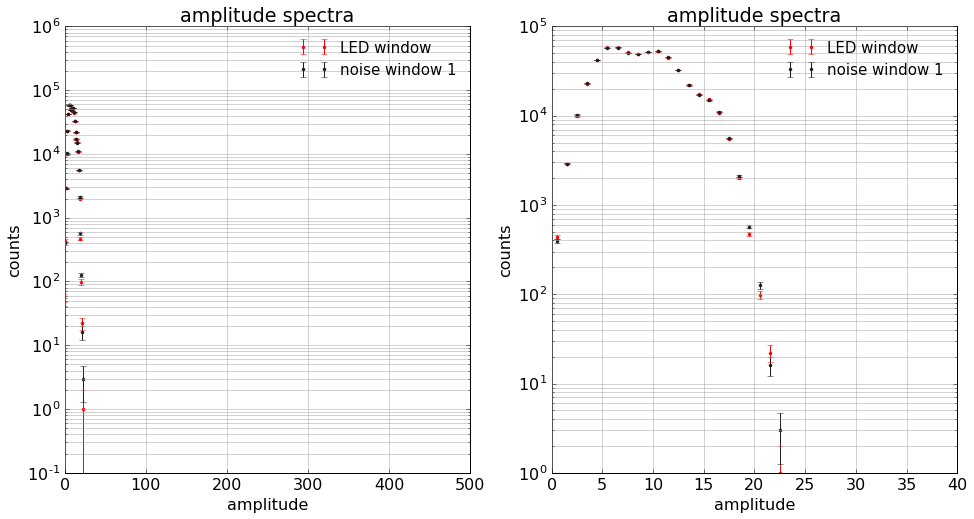

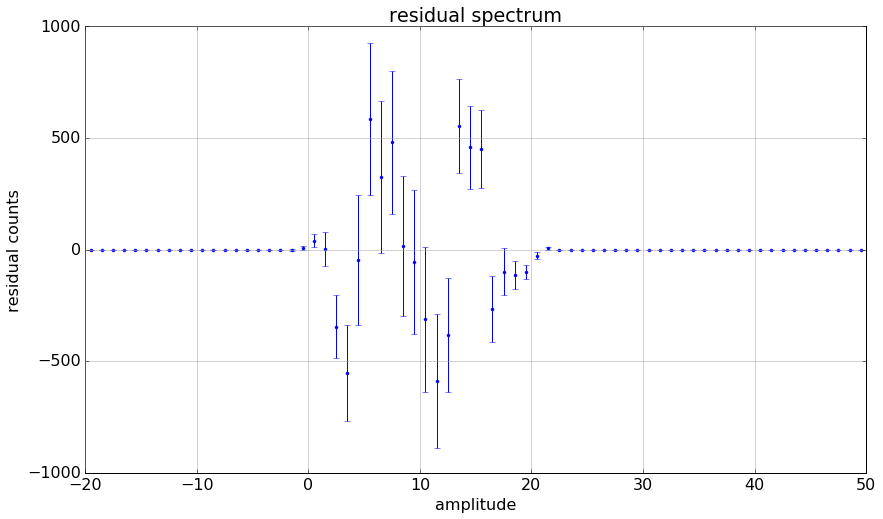

15


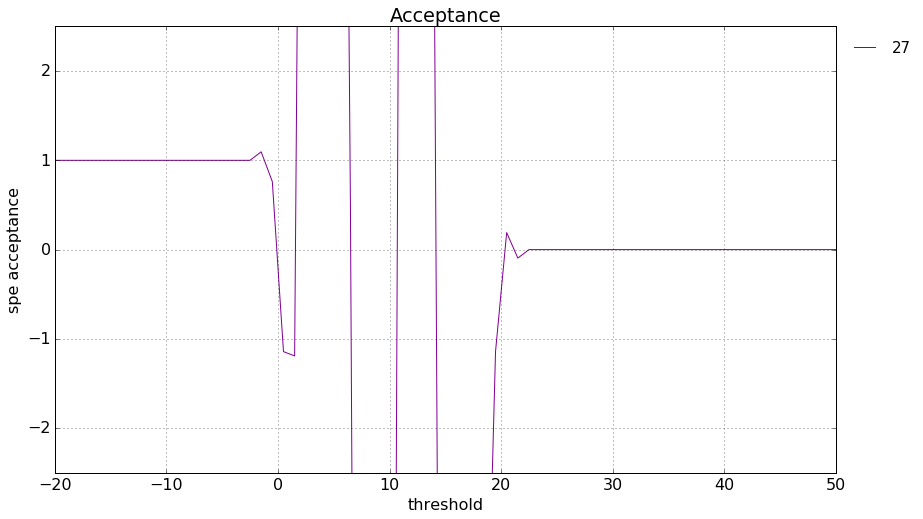

In [105]:
from matplotlib import cm

DEBUG = True
WRITE = False
accepts_list = np.arange(0.05, 1, 0.05)

if WRITE:
    print("Writing to %s and %s" % (thresholds_file, histograms_file))
    f_thresh = open(thresholds_file, 'w')
    f_hist = open(histograms_file, 'w')

    f_thresh.write("ch")
    for a in accepts_list:
        f_thresh.write("," + str(a))
    f_thresh.write("\n")

    f_hist.write("ch,amplitude,LED,LEDerr,NOISE,NOISEerr,NOISEcorr,residual,residualerr,acceptance\n")


for ch in tqdm(range(n_channels)):
    if ch in off_channels:
        continue
    if ch == show_channels[2]:    
    #if ch in show_channels:
        #print(ch)
        channel = ch
        #data = amplitude_survival.slicesum(ch, ch, 'channel')
        #data2 = spe_amplitude_survival.slicesum(ch, ch, 'channel')
        
        spe_spectrum = spe_hist_max.slice(ch,ch,'channel').project('amplitude')
        noise_spectrum_1 = noise_hist_max_1.slice(ch,ch,'channel').project('amplitude')
        noise_spectrum_2 = noise_hist_max_2.slice(ch,ch,'channel').project('amplitude')
        noise_spectrum_3 = noise_hist_max_3.slice(ch,ch,'channel').project('amplitude')
        noise_spectrum_4 = noise_hist_max_4.slice(ch,ch,'channel').project('amplitude')
        
        spe_charge_spectrum = spe_integral.slice(ch,ch,'channel').project('charge')
        noise_charge_spectrum = noise_integral.slice(ch,ch,'channel').project('charge')
        
        residual_charge_spectrum = spe_charge_spectrum - noise_charge_spectrum
    
        average_noise_spectrum.histogram = np.ones(len(noise_spectrum_1.histogram))
        
        for b in range(len(noise_spectrum_1.histogram)):
            mean = np.mean([float(noise_spectrum_1.histogram[b]), 
                            float(noise_spectrum_2.histogram[b]),
                            float(noise_spectrum_3.histogram[b]),
                            float(noise_spectrum_4.histogram[b])])
            
            average_noise_spectrum.histogram[b] *= mean  
        
        noise1_errors = np.sqrt(noise_spectrum_1.histogram)
        spe_errors = np.sqrt(spe_spectrum.histogram)
        
        bin_correct = 6
        
        bin0 = np.where(spe_charge_spectrum.bin_edges == 0)[0][0]
        spe_charge_first10 = spe_charge_spectrum.histogram[bin0:(bin0+bin_correct)].sum()
        noise_charge_first10 = noise_charge_spectrum.histogram[bin0:(bin0+bin_correct)].sum()
        
        spe_amp_first10 = spe_spectrum.histogram[bin0:(bin0+bin_correct)].sum()
        noise_amp_first10 = noise_spectrum_1.histogram[bin0:(bin0+bin_correct)].sum()
        
        #correction = small_correction * spe_amp_first10/noise_amp_first10
        #print('correction on noise: ', correction)
        
        #noise_spectrum_1.histogram = correction * noise_spectrum_1
        #noise1_errors *= correction
        
        residual_spectrum = spe_spectrum - noise_spectrum_1
        residual_errors = np.sqrt(noise1_errors**2 + spe_errors**2)
        
        in_errors = True
        starter_bin = np.where(average_noise_spectrum.bin_edges == 0)[0] - 1
        while not in_errors:
            starter_bin += 1
            in_errors = (noise_spectrum_1.histogram[starter_bin] - noise1_errors[starter_bin] <=
                         spe_spectrum.histogram[starter_bin] + spe_errors[starter_bin]) and (spe_spectrum.bin_centers[starter_bin] >= 20)
            
            #print(average_noise_spectrum.histogram[starter_bin], average_noise_errors[starter_bin],
             #            spe_spectrum.histogram[starter_bin], spe_errors[starter_bin])
            residual_spectrum.histogram[starter_bin] = 0
 
        #data.plot(color = 'red')
        #print(data2.histogram)
        #data2.plot(color = 'black')
        #data.plot(color=cm.spectral(1*board_1_channels.index(ch)/len(board_1_channels)), linestyle='-', label='%d'% ch)
        
        #plt.subplot(211)
        spe_acceptance = spe_amplitude_survival.slice(ch,ch,'channel').project('amplitude')
        
        
        noise_acceptance = correction * noise_amplitude_survival_1.slice(ch,ch,'channel').project('amplitude') 

        
        residual_acceptance = spe_acceptance - noise_acceptance
        max_T = np.argmax(residual_acceptance.histogram)
        residual_acceptance = residual_acceptance / residual_acceptance[max_T]
        
        if DEBUG:
            fig = plt.figure(figsize = (16,8))
            plt.subplot(121)            
            spe_spectrum.plot(color = 'red', errors = True, label = 'LED window')
            noise_spectrum_1.plot(color = cm.Greys(0.9), errors = True, label = 'noise window 1')
            #noise_spectrum_2.plot(color = cm.Greys(0.5), errors = True, label = 'noise window 2')
            #noise_spectrum_3.plot(color = cm.Greys(0.7), errors = True, label = 'noise window 3')
            #noise_spectrum_4.plot(color = cm.Greys(0.9), errors = True, label = 'noise window 4')


            plt.yscale('log')
            plt.xlim(0,500)
            plt.ylim(0.1,1e6)
            plt.title('amplitude spectra')
            plt.xlabel('amplitude')
            plt.ylabel('counts')
            #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
            plt.legend(loc='upper right',  fontsize = 15, frameon=False)
            plt.grid(b=True, which='both', color='0.65',linestyle='-')

            plt.subplot(122)
            spe_spectrum.plot(color = 'red', errors = True, label = 'LED window')
            noise_spectrum_1.plot(color = cm.Greys(0.9), errors = True, label = 'noise window 1')
            #noise_spectrum_2.plot(color = cm.Greys(0.5), errors = True, label = 'noise window 2')
            #noise_spectrum_3.plot(color = cm.Greys(0.7), errors = True, label = 'noise window 3')
            #noise_spectrum_4.plot(color = cm.Greys(0.9), errors = True, label = 'noise window 4')
            plt.yscale('log')
            plt.xlim(0,40)
            plt.ylim(1,1e5)
            plt.title('amplitude spectra')
            plt.xlabel('amplitude')
            plt.ylabel('counts')
            #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
            plt.legend(loc='upper right',  fontsize = 15, frameon=False)
            plt.grid(b=True, which='both', color='0.65',linestyle='-')
            plt.show()
            
            #residual_spectrum.plot()
            plt.figure(figsize=(14,8))
            plt.errorbar(residual_spectrum.bin_centers, residual_spectrum.histogram, yerr = residual_errors, 
                         ecolor='b', marker = '.', linestyle = 'None')
            plt.yscale('linear')
            plt.xlim(-20,50)
            plt.ylim(-1000, 1000)
            plt.title('residual spectrum')
            plt.xlabel('amplitude')
            plt.ylabel('residual counts')
            plt.grid(b=True, which='both', color='0.65',linestyle='-')
            plt.show()
            
        thresh_90 = find_threshold(residual_spectrum,0.9)
        print(thresh_90)
        
        if WRITE:
            f_thresh.write(str(ch))
        
            for a in accepts_list:
                T = find_threshold(residual_spectrum, a)
                f_thresh.write("," + str(T))
            f_thresh.write("\n")
            
            
        residual_cum = residual_spectrum.cumulative_density
        residual_cum = 1 - residual_cum
        
        if WRITE:
            for BIN in range(len(residual_spectrum.histogram)):
                f_hist.write("{CH},{amp},{LED},{LEDerr},{NOISE},{NOISEerr},{NOISEcorr},{residual},{residualerr},{acceptance}\n".format(CH=ch,
                            amp=residual_spectrum.bin_centers[BIN], LED=spe_spectrum.histogram[BIN],
                            LEDerr=spe_errors[BIN], NOISE=noise_spectrum_1.histogram[BIN], NOISEerr=noise1_errors[BIN], 
                            NOISEcorr=correction, residual=residual_spectrum.histogram[BIN], residualerr=residual_errors[BIN],
                            acceptance=residual_cum[BIN]))
        
        #residual_cum *= residual_spectrum.histogram[]
        plt.figure(figsize=(14,8))
        plt.plot(residual_spectrum.bin_centers, residual_cum,color = cm.spectral(1*show_channels.index(ch)/len(show_channels)), label = '%i'%ch)
        #residual_acceptance.plot(color = cm.spectral(1*show_channels.index(ch)/len(show_channels)))
        plt.xlim(-20,50)
        plt.ylim(-2.5,2.5)
        plt.title('Acceptance')

plt.xlabel('threshold')
plt.ylabel('spe acceptance')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
#plt.plot([thresh_90, thresh_90], [0, 1.1], color = 'blue')
#plt.plot([-5,500], [0.90,0.90])
plt.grid(b=True)
plt.savefig('newest_acceptances_BAD.png')
plt.show()
#board_7_channels = [157, 158,
#                    167, 168, 169,
#                    177, 178, 179, 180, 181,
#                    188, 189, 190, 191, 192,
#                    201, 202, 203, 204,
#                    213, 214, 215,
#                    224, 225]        
#color = cm.spectral(1*show_channels.index(ch)/len(show_channels))

In [1289]:
# find when integral is 0

for i in residual_cum:
    if i<

-100.0


In [629]:
event1_start = event.start_time
event1_stop = event.stop_time
event = next(event_generator)
event2_start = event.start_time
event2_stop = event.stop_time

print(event1_start, event1_stop, (event1_stop - event1_start)/1.0e3)
print(event2_start, event2_stop, (event2_stop - event2_start)/1.0e3)
print(event2_start, event1_start, (event2_start - event1_start)/1.0e6)


1462883951088711810 1462883951088821810 110.0
1462883951098542170 1462883951098652170 110.0
1462883951098542170 1462883951088711810 9.83036


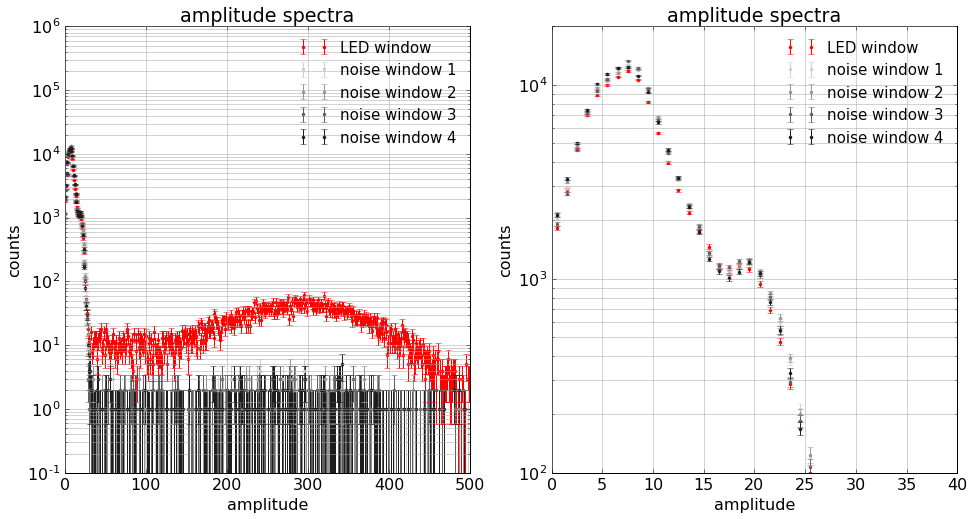

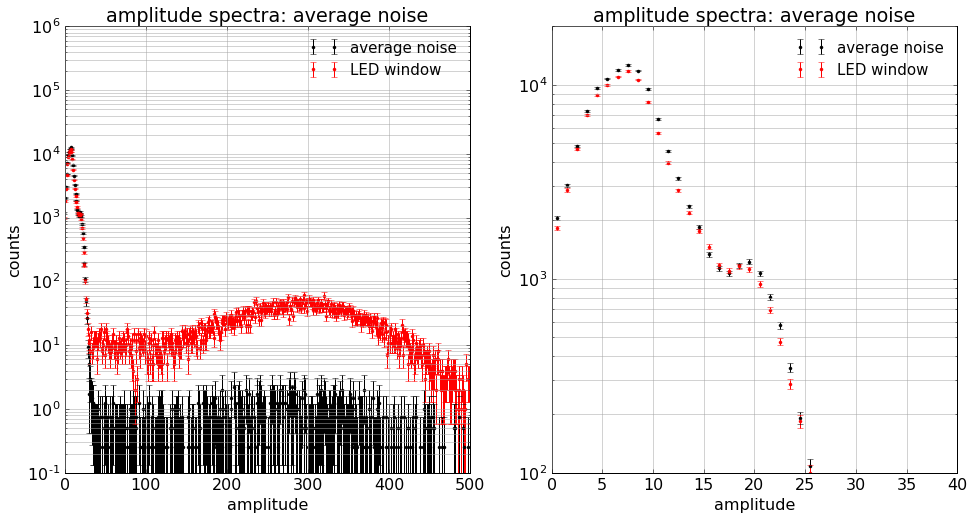

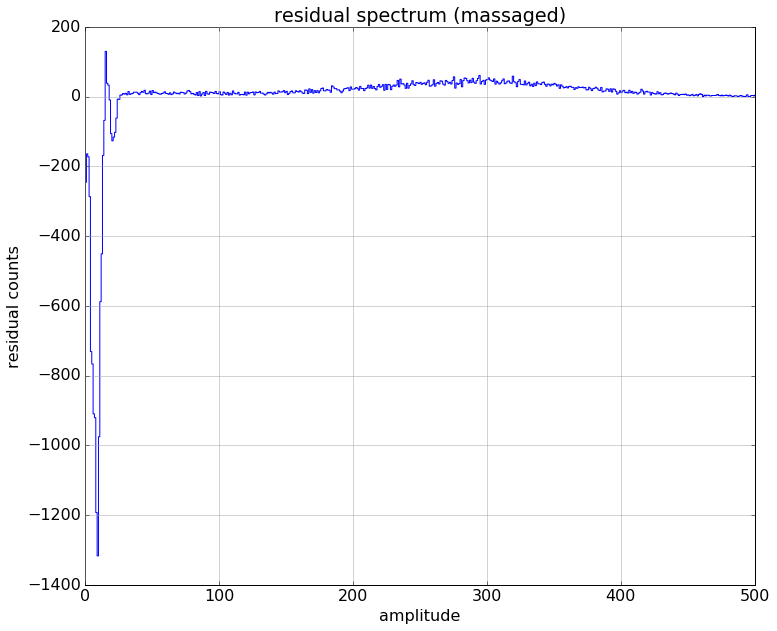

In [1014]:
        fig = plt.figure(figsize = (16,8))
        plt.subplot(121)
        
            
        spe_spectrum.plot(color = 'red', errors = True, label = 'LED window')
        noise_spectrum_1.plot(color = cm.Greys(0.3), errors = True, label = 'noise window 1')
        noise_spectrum_2.plot(color = cm.Greys(0.5), errors = True, label = 'noise window 2')
        noise_spectrum_3.plot(color = cm.Greys(0.7), errors = True, label = 'noise window 3')
        noise_spectrum_4.plot(color = cm.Greys(0.9), errors = True, label = 'noise window 4')


        plt.yscale('log')
        plt.xlim(0,500)
        plt.ylim(0.1,1e6)
        plt.title('amplitude spectra')
        plt.xlabel('amplitude')
        plt.ylabel('counts')
        #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
        plt.legend(loc='upper right',  fontsize = 15, frameon=False)
        plt.grid(b=True, which='both', color='0.65',linestyle='-')
        
        plt.subplot(122)
        spe_spectrum.plot(color = 'red', errors = True, label = 'LED window')
        noise_spectrum_1.plot(color = cm.Greys(0.3), errors = True, label = 'noise window 1')
        noise_spectrum_2.plot(color = cm.Greys(0.5), errors = True, label = 'noise window 2')
        noise_spectrum_3.plot(color = cm.Greys(0.7), errors = True, label = 'noise window 3')
        noise_spectrum_4.plot(color = cm.Greys(0.9), errors = True, label = 'noise window 4')
        plt.yscale('log')
        plt.xlim(0,40)
        plt.ylim(1e2,2e4)
        plt.title('amplitude spectra')
        plt.xlabel('amplitude')
        plt.ylabel('counts')
        #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
        plt.legend(loc='upper right',  fontsize = 15, frameon=False)
        plt.grid(b=True, which='both', color='0.65',linestyle='-')
        plt.show()
        
        fig = plt.figure(figsize = (16,8))
        plt.subplot(121)
        average_noise_spectrum.plot(color = 'black', label = 'average noise', errors = True)
        spe_spectrum.plot(color = 'red', label = 'LED window', errors = True)
        plt.yscale('log')
        plt.xlim(0,500)
        plt.ylim(0.1,1e6)
        plt.title('amplitude spectra: average noise')
        plt.xlabel('amplitude')
        plt.ylabel('counts')
        #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
        plt.legend(loc='upper right',  fontsize = 15, frameon=False)
        plt.grid(b=True, which='both', color='0.65',linestyle='-')
        #plt.show()
        
        
        plt.subplot(122)
        average_noise_spectrum.plot(color = 'black', label = 'average noise', errors = True)
        spe_spectrum.plot(color = 'red', label = 'LED window', errors = True)
        plt.yscale('log')
        plt.xlim(0,40)
        plt.ylim(1e2,2e4)
        plt.title('amplitude spectra: average noise')
        plt.xlabel('amplitude')
        plt.ylabel('counts')
        #plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
        plt.legend(loc='upper right',  fontsize = 15, frameon=False)
        plt.grid(b=True, which='both', color='0.65',linestyle='-')
        plt.show()
        
        #print("starter bin: ", starter_bin)
        residual_spectrum.plot()
        plt.yscale('linear')
        plt.xlim(0,500)
        #plt.ylim(-50, 300)
        plt.title('residual spectrum (massaged)')
        plt.xlabel('amplitude')
        plt.ylabel('residual counts')
        plt.grid(b=True, which='both', color='0.65',linestyle='-')
        plt.show()
        


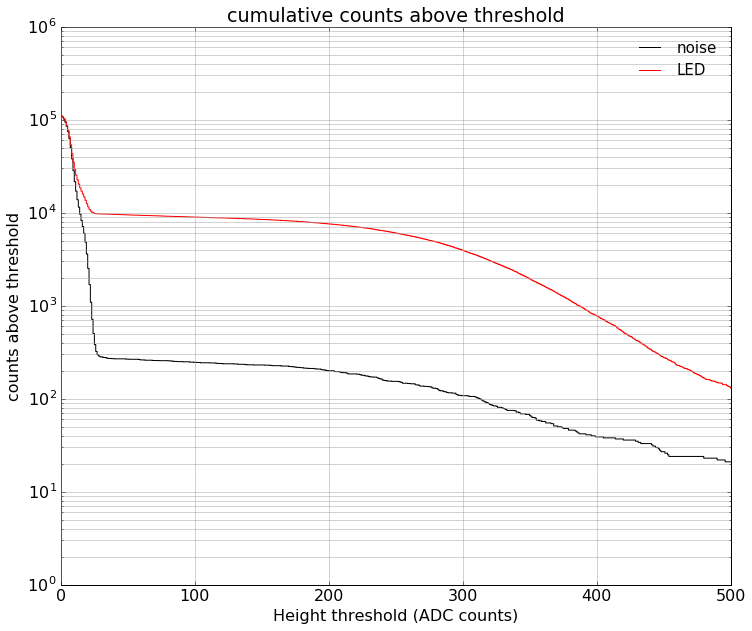

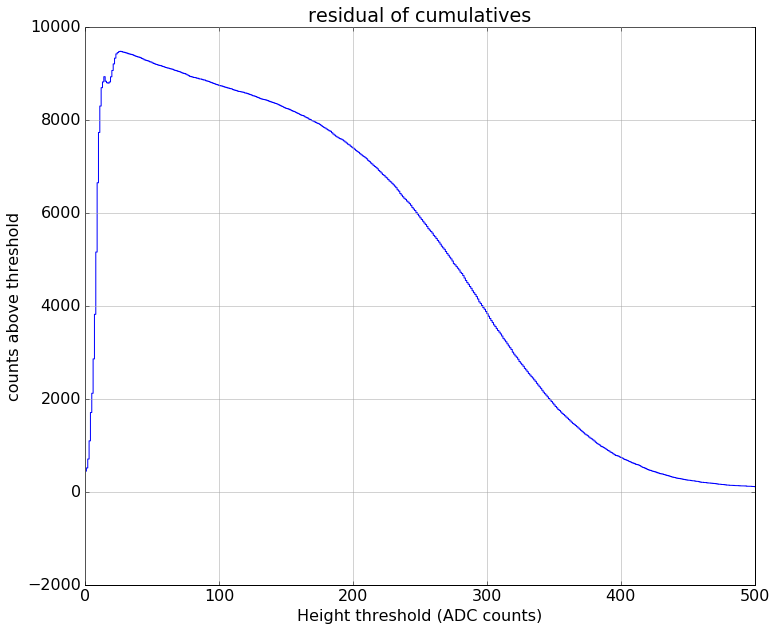

In [1007]:
xlimits = (0,500)
ylimits = (5e1,2e5)        
      
noise_acceptance.plot(color = 'black', label = 'noise')
spe_acceptance.plot(color = 'red', label = 'LED')
#plt.subplot(211)
plt.yscale('log')
plt.ylim(1, 1e6)
plt.xlabel('Height threshold (ADC counts)')
plt.ylabel('counts above threshold')
plt.xlim(*xlimits)
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc='upper right', fontsize = 15, frameon=False)
plt.title('cumulative counts above threshold')
#plt.title("Noise amplitude distribution for channels on Board 1")
#plt.savefig("Filter_Box_Test_output/amplitudes_board_1_zoom_Run173.png")
#plt.savefig("%samplitudes_board_1_zoom.png" %output_prefix)
plt.show()
        
#plt.subplot(212)
residual_acceptance.plot()
plt.yscale('linear')
#plt.ylim(-100, 100)
plt.xlim(0,500)
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.title('residual of cumulatives')
plt.xlabel('Height threshold (ADC counts)')
plt.ylabel('counts above threshold')
plt.show()
        

               


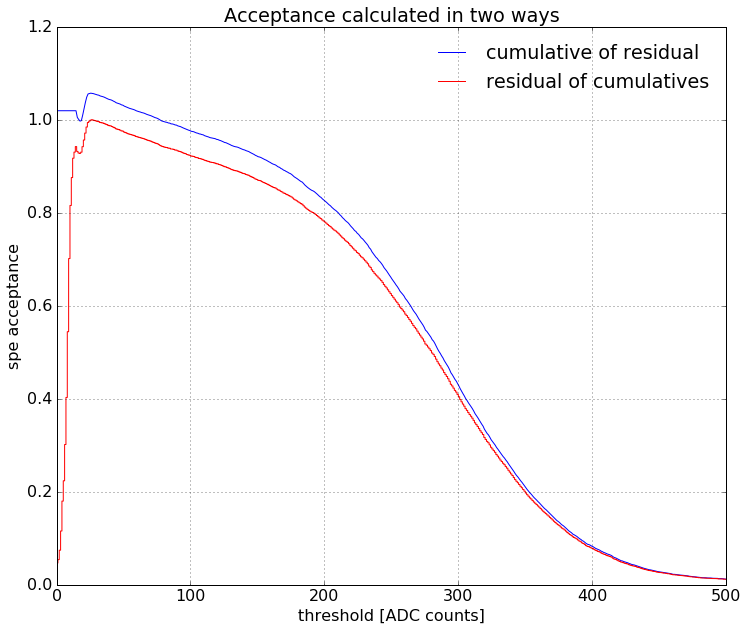

In [1012]:
ch = show_channels[2]

for ch in tqdm(range(n_channels)):
    if ch in show_channels:
        max_T = np.argmax(residual_acceptance.histogram)


residual_cum = residual_spectrum.cumulative_density
residual_cum = 1 - residual_cum
#residual_cum *= residual_spectrum.histogram[]
plt.plot(residual_spectrum.bin_centers, residual_cum, color = 'blue', label = 'cumulative of residual')
plt.xlim(0,500)
#plt.ylim(0,1.1)
plt.title('Acceptance calculated in two ways')

#plt.xlabel('amplitude')
plt.ylabel('spe acceptance')
#plt.show()

spe_acceptance_fraction = residual_acceptance / residual_acceptance[max_T]
spe_acceptance_fraction.plot(color = 'red', label = 'residual of cumulatives')
plt.yscale('linear')
plt.xlim(0,500)
plt.ylim(0,1.2)
#plt.title('Method 2: residual of cumulatives')
#plt.ylabel('spe acceptance')
plt.xlabel('threshold [ADC counts]')
plt.legend(loc = 'upper right', frameon = False)
plt.grid(b = True)
plt.show()
        

#residual_acceptance.plot()
#plt.ylim(1500, 2500)
#plt.xlim(0,50)
#plt.show()

#normalize to get acceptance fraction



114075.0 114070.0


5.0

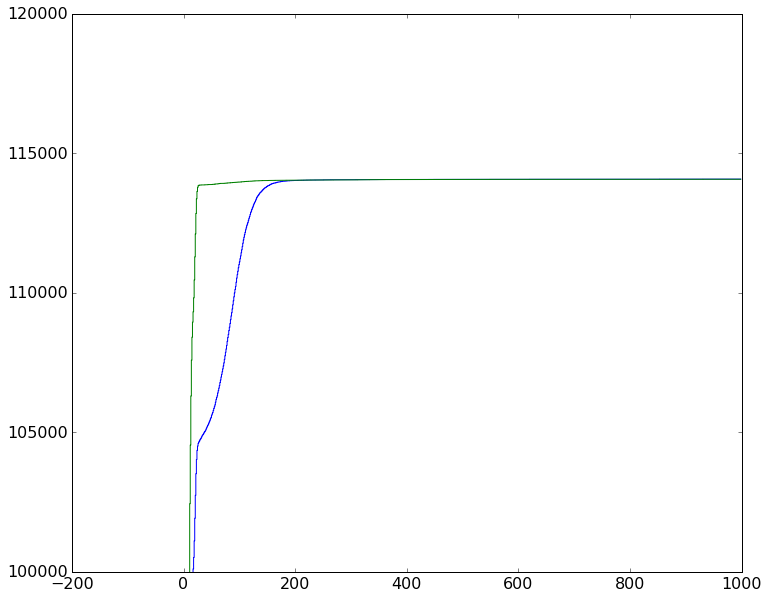

In [981]:
ch = show_channels[2]

spe_cumulative = spe_hist_max.slice(ch,ch,'channel').project('amplitude')
noise_cumulative = noise_hist_max_1.slice(ch,ch,'channel').project('amplitude')

spe_cumulative.histogram = spe_cumulative.cumulative_histogram
noise_cumulative.histogram = noise_cumulative.cumulative_histogram

spe_cumulative.plot()
noise_cumulative.plot()
plt.ylim(1e5,1.2e5)

print(spe_cumulative.histogram[-1], noise_cumulative.histogram[-1])
spe_cumulative.histogram[-2] - noise_cumulative.histogram[-2]


## two methods of calculating spe acceptance


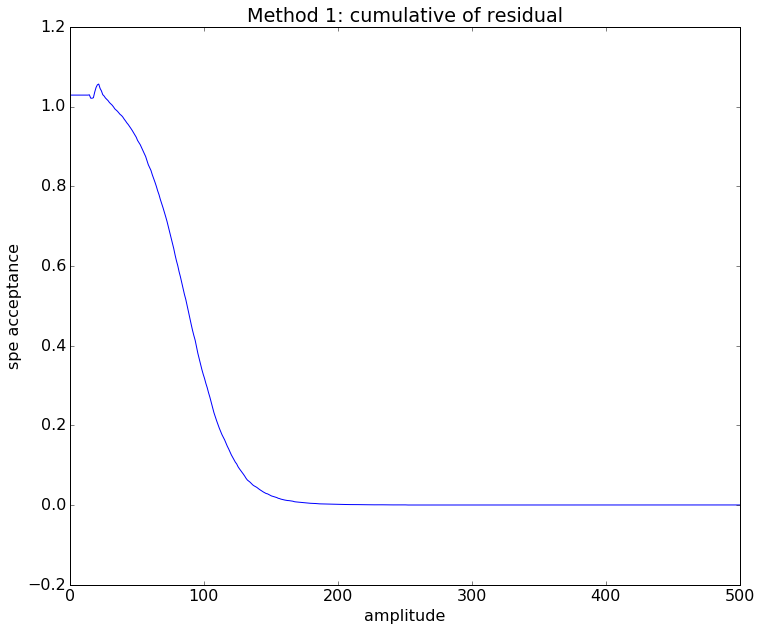

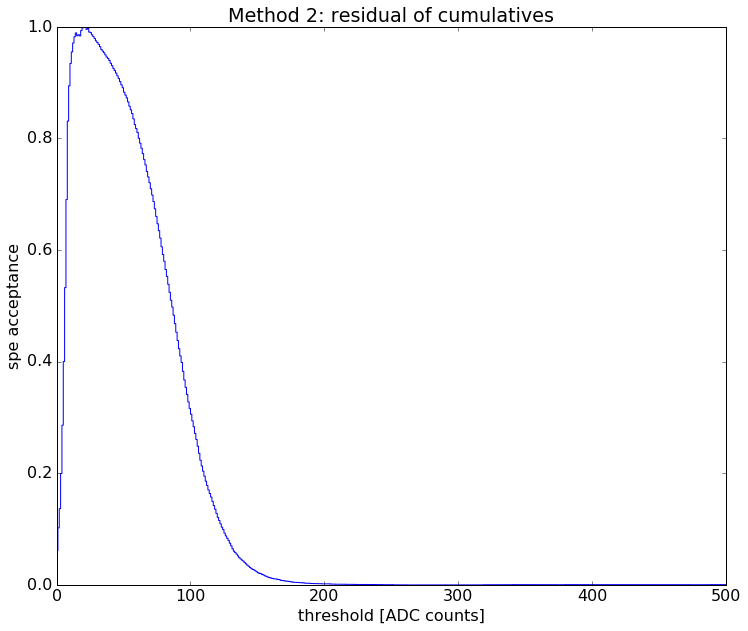

# Next steps:
 # 1.  Not trivial at the moment how to define where the spe signal begins - this significantly alters what we determine to be the acceptance (see above).
 # 2. Once confident that we understand low threshold stuff, need to do this same thing for every channel and at multiple PMT biases. 



In [ ]:
# fit function

gauss_range = [5, 15]
draw_gauss = [0, 25]


def qnorm(T, const, mu, sigma):
    q = const*(1 - erf((T-mu)/(sigma*np.sqrt(2)))) 
    return q


# fit data with qnorm, qexp defined above


gauss_data = []
exp_data = []
overall_data = []

for i, rate in enumerate(data.histogram):
    if gauss_range[0] < data.bin_centers[i] < gauss_range[1]:
        gauss_data.append(rate)
    if exp_range[0] < data.bin_centers[i] < exp_range[1]:
        exp_data.append(rate)
    if overall_fit_range[0] < data.bin_centers[i] < overall_fit_range[1]:
        overall_data.append(rate)
        
gauss_thresholds = [x for x in data.bin_centers if gauss_range[0]<x<gauss_range[1]]
exp_thresholds = [x for x in data.bin_centers if exp_range[0]<x<exp_range[1]]
overall_thresholds = [x for x in data.bin_centers if overall_fit_range[0]<x<overall_fit_range[1]]

assert len(gauss_thresholds)==len(gauss_data)
assert len(exp_thresholds)==len(exp_data)
assert len(overall_thresholds)==len(overall_data)

#plt.plot(gauss_thresholds, gauss_data)


#first_guess = [1.0e8, 0, 20]
first_guess_gauss = [1.0e8, 0.0, 5.0]
fit_pars, fit_cov = curve_fit(qnorm, gauss_thresholds, gauss_data, first_guess_gauss)

first_guess_exp = [1.0e10, -1.0]
exp_fit_pars, exp_fit_cov = curve_fit(qexp, exp_thresholds, exp_data, first_guess_exp)

first_guess_total_fit = np.append(fit_pars, exp_fit_pars)

overall_fit_pars, overall_fit_cov = curve_fit(fit_sum, overall_thresholds, overall_data, first_guess_total_fit)

sumfit_pars = np.append(fit_pars, exp_fit_pars)

print("Gaussian fit parameters(const, mu, sigma): ", fit_pars)
print("Exponential fit parameters(const, mean): ", exp_fit_pars)

print("Fit parameters (gauss0, gauss1, gauss2, exp0, exp1) from overall fit:", overall_fit_pars)

qdata = [qnorm(x, *fit_pars) for x in np.arange(draw_gauss[0], draw_gauss[1], 0.1)]

exp_fit_line = [qexp(x, *exp_fit_pars) for x in np.arange(draw_exp[0], draw_exp[1], 0.1)]

#sumfit_line = [fit_sum(x, *sumfit_pars) for x in np.arange(overall_draw_range[0], overall_draw_range[1], 0.1)]
sumfit_line = [fit_sum(x, *overall_fit_pars) for x in np.arange(overall_draw_range[0], overall_draw_range[1], 0.1)]

thresholds = data.bin_centers
rates = data.histogram

fit = plt.plot(np.arange(draw_gauss[0], draw_gauss[1],0.1), qdata, 'b')
fit2 = plt.plot(np.arange(draw_exp[0], draw_exp[1],0.1), exp_fit_line, 'r')
sumfit = plt.plot(np.arange(overall_draw_range[0], overall_draw_range[1], 0.1), sumfit_line, 'g')

real_points = plt.plot(thresholds, rates, 'ko')

plt.yscale('log')
plt.ylim(1e3, 1e8)
plt.xlabel('Height threshold (ADC counts)')
plt.ylabel('Rate above threshold (Hz)')
plt.xlim(0, 50)
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
plt.title("Noise amplitude distribution for channels on Board 1")
#plt.savefig("Filter_Box_Test_output/amplitudes_board_1_zoom_Run173.png")
plt.show()



Gaussian fit parameters(const, mu, sigma):  [  2.52452252e+07   1.52955197e+00   5.76918322e+00]
Exponential fit parameters(const, mean):  [  9.41026716e+04  -1.60053865e-02]
Fit parameters (gauss0, gauss1, gauss2, exp0, exp1) from overall fit: [  6.94920100e+06   7.64826781e+00   3.71101843e+00   6.04518031e+04
  -2.15320079e-03]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


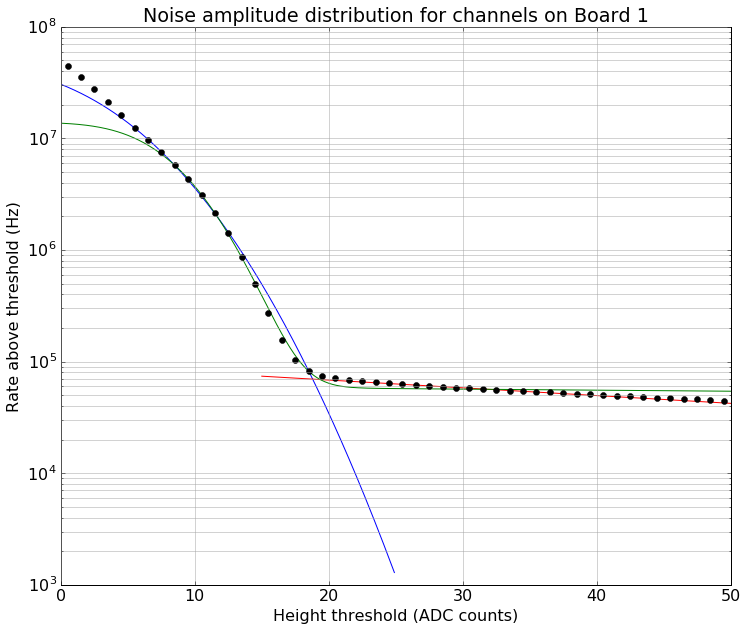

In [318]:
# fit function

from scipy.optimize import curve_fit
from scipy.special import erf, factorial

gauss_range = [5, 15]
exp_range = [25,35]
overall_fit_range = [8, 40]

draw_gauss = [0, 25]
draw_exp = [15, 100]
overall_draw_range = [0, 100]


#def qnorm(T, const1, const2, mu2, sigma1, sigma2):
#    q = const1*sigma1*np.sqrt(np.pi/2.)*(1 - erf((T)/(sigma1*np.sqrt(2)))) + const2*sigma2*np.sqrt(np.pi/2.)*(1 - erf((T-mu2)/(sigma2*np.sqrt(2)))) 
#    return q

def qnorm(T, const, mu, sigma):
    q = const*(1 - erf((T-mu)/(sigma*np.sqrt(2)))) 
    return q

def qexp(T, const, mean):
    q = const * np.exp(mean * T)
    return q

def fit_sum(T, gauss0, gauss1, gauss2, exp0, exp1):
    val = qnorm(T, gauss0, gauss1, gauss2) + qexp(T, exp0, exp1) 
    return val

# fit data with qnorm, qexp defined above


gauss_data = []
exp_data = []
overall_data = []

for i, rate in enumerate(data.histogram):
    if gauss_range[0] < data.bin_centers[i] < gauss_range[1]:
        gauss_data.append(rate)
    if exp_range[0] < data.bin_centers[i] < exp_range[1]:
        exp_data.append(rate)
    if overall_fit_range[0] < data.bin_centers[i] < overall_fit_range[1]:
        overall_data.append(rate)
        
gauss_thresholds = [x for x in data.bin_centers if gauss_range[0]<x<gauss_range[1]]
exp_thresholds = [x for x in data.bin_centers if exp_range[0]<x<exp_range[1]]
overall_thresholds = [x for x in data.bin_centers if overall_fit_range[0]<x<overall_fit_range[1]]

assert len(gauss_thresholds)==len(gauss_data)
assert len(exp_thresholds)==len(exp_data)
assert len(overall_thresholds)==len(overall_data)

#plt.plot(gauss_thresholds, gauss_data)


#first_guess = [1.0e8, 0, 20]
first_guess_gauss = [1.0e8, 0.0, 5.0]
fit_pars, fit_cov = curve_fit(qnorm, gauss_thresholds, gauss_data, first_guess_gauss)

first_guess_exp = [1.0e10, -1.0]
exp_fit_pars, exp_fit_cov = curve_fit(qexp, exp_thresholds, exp_data, first_guess_exp)

first_guess_total_fit = np.append(fit_pars, exp_fit_pars)

overall_fit_pars, overall_fit_cov = curve_fit(fit_sum, overall_thresholds, overall_data, first_guess_total_fit)

sumfit_pars = np.append(fit_pars, exp_fit_pars)

print("Gaussian fit parameters(const, mu, sigma): ", fit_pars)
print("Exponential fit parameters(const, mean): ", exp_fit_pars)

print("Fit parameters (gauss0, gauss1, gauss2, exp0, exp1) from overall fit:", overall_fit_pars)

qdata = [qnorm(x, *fit_pars) for x in np.arange(draw_gauss[0], draw_gauss[1], 0.1)]

exp_fit_line = [qexp(x, *exp_fit_pars) for x in np.arange(draw_exp[0], draw_exp[1], 0.1)]

#sumfit_line = [fit_sum(x, *sumfit_pars) for x in np.arange(overall_draw_range[0], overall_draw_range[1], 0.1)]
sumfit_line = [fit_sum(x, *overall_fit_pars) for x in np.arange(overall_draw_range[0], overall_draw_range[1], 0.1)]

thresholds = data.bin_centers
rates = data.histogram

fit = plt.plot(np.arange(draw_gauss[0], draw_gauss[1],0.1), qdata, 'b')
fit2 = plt.plot(np.arange(draw_exp[0], draw_exp[1],0.1), exp_fit_line, 'r')
sumfit = plt.plot(np.arange(overall_draw_range[0], overall_draw_range[1], 0.1), sumfit_line, 'g')

real_points = plt.plot(thresholds, rates, 'ko')

plt.yscale('log')
plt.ylim(1e3, 1e8)
plt.xlabel('Height threshold (ADC counts)')
plt.ylabel('Rate above threshold (Hz)')
plt.xlim(0, 50)
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 15, frameon=False)
plt.title("Noise amplitude distribution for channels on Board 1")
#plt.savefig("Filter_Box_Test_output/amplitudes_board_1_zoom_Run173.png")
plt.show()

